# <center>Machine learning for the working (biomedical) researcher</center>
## <center>WebValley 2018 @ Casez (TN)</center>
### <center>Marco Chierici</center>
#### <center>_Data scientist, FBK/MPBA_</center>


In this handout we will go through basic concepts of machine learning using Scikit-learn and the SEQC neuroblastoma data set [Zhang et al, _Genome Biology_, 2015].

<img src="img/zhang.png" width="65%" />

In particular, we will focus on **a subset of 272 samples (136 training, 136 test)**, aiming at predicting an **extreme disease outcome** (favorable vs unfavorable samples: see main paper).

<img src="img/zhang_tab2.png" width="95%" />

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Display plots within the notebook
%matplotlib inline

Load the training set data:

In [3]:
data_tr = pd.read_csv("data/nb_train.txt.gz", dtype=str, sep='\t', index_col=0)

Now let's have a look at the data. First, the dimensions:

In [4]:
data_tr.shape

(136, 12305)

What's inside?

A peek at the first rows reveals that the first column (the dataframe **index**) contains the sample IDs, the second column is the class (or target), and the remaining columns are genes:

In [5]:
data_tr.head()

,class,NAT2,ADA,POU5F1P6,NR2E3,NAALAD2,VN2R10P,SNORD116-1,SNORD116-13,SNORD116-14,...,HS3ST2,HS3ST1,MVP,FGF19,TNFSF15,NR1H4,CLEC2B,CDC42,CDH1,KCNE2
sampleID,,,,,,,,,,,,,,,,,,,,,
NB001,1,0.0,13.01,3.61,4.48,12.56,8.23,9.49,2.97,0.0,...,9.81,10.55,14.67,11.26,9.2,5.48,12.2,8.6,11.54,0.0
NB003,1,0.0,11.22,0.0,7.35,13.43,4.11,10.63,7.09,5.94,...,8.89,11.04,12.91,0.0,4.77,0.0,9.68,8.9,7.22,3.95
NB005,1,7.71,12.24,6.18,7.17,13.43,0.0,11.6,9.15,4.11,...,9.29,10.24,14.58,0.0,9.8,0.0,9.77,9.09,6.81,0.0
NB011,-1,0.0,13.26,4.03,6.21,13.91,4.64,11.71,8.59,8.71,...,8.44,10.91,14.58,5.91,11.22,0.0,12.25,9.41,9.68,6.23
NB013,1,0.0,12.01,7.29,7.66,14.92,3.48,7.37,7.78,0.0,...,12.63,10.13,14.82,5.44,8.52,0.0,10.76,10.0,8.54,0.0


We can access the sample IDs...

In [6]:
data_tr.index

Index(['NB001', 'NB003', 'NB005', 'NB011', 'NB013', 'NB017', 'NB019', 'NB021',
       'NB023', 'NB025',
       ...
       'NB407', 'NB417', 'NB421', 'NB471', 'NB473', 'NB475', 'NB479', 'NB493',
       'NB495', 'NB497'],
      dtype='object', name='sampleID', length=136)

... and the column names:

In [7]:
data_tr.columns

Index(['class', 'NAT2', 'ADA', 'POU5F1P6', 'NR2E3', 'NAALAD2', 'VN2R10P',
       'SNORD116-1', 'SNORD116-13', 'SNORD116-14',
       ...
       'HS3ST2', 'HS3ST1', 'MVP', 'FGF19', 'TNFSF15', 'NR1H4', 'CLEC2B',
       'CDC42', 'CDH1', 'KCNE2'],
      dtype='object', length=12305)

For the remaining part of this hands-on, we need the data to be stored in a Numpy array:

In [8]:
data_tr.values

array([['1', '0.0', '13.01', ..., '8.6', '11.54', '0.0'],
       ['1', '0.0', '11.22', ..., '8.9', '7.22', '3.95'],
       ['1', '7.71', '12.24', ..., '9.09', '6.81', '0.0'],
       ...,
       ['-1', '1.65', '11.65', ..., '9.49', '7.82', '5.08'],
       ['-1', '5.67', '12.73', ..., '9.5', '9.62', '1.31'],
       ['-1', '3.62', '12.51', ..., '9.48', '8.88', '5.89']], dtype=object)

This keeps the class column as well.

But...

We need to separate the class from the data, so let's recreate our array by dropping the class column from the original dataframe:

In [9]:
data_tr.values[:, 1:]

array([['0.0', '13.01', '3.61', ..., '8.6', '11.54', '0.0'],
       ['0.0', '11.22', '0.0', ..., '8.9', '7.22', '3.95'],
       ['7.71', '12.24', '6.18', ..., '9.09', '6.81', '0.0'],
       ...,
       ['1.65', '11.65', '6.95', ..., '9.49', '7.82', '5.08'],
       ['5.67', '12.73', '3.24', ..., '9.5', '9.62', '1.31'],
       ['3.62', '12.51', '3.33', ..., '9.48', '8.88', '5.89']],
      dtype=object)

Let's set the dtype to float and save the array to x_tr:

In [10]:
x_tr = data_tr.values[:, 1:].astype(float)

When coding, it is a good practice to have a peek at the resulting variables, to be sure everything is OK: i.e., is that variable like it is supposed to be? Did I accidentally throw away a feature column?

This can avoid lots of problems later on!

In [11]:
x_tr

array([[ 0.  , 13.01,  3.61, ...,  8.6 , 11.54,  0.  ],
       [ 0.  , 11.22,  0.  , ...,  8.9 ,  7.22,  3.95],
       [ 7.71, 12.24,  6.18, ...,  9.09,  6.81,  0.  ],
       ...,
       [ 1.65, 11.65,  6.95, ...,  9.49,  7.82,  5.08],
       [ 5.67, 12.73,  3.24, ...,  9.5 ,  9.62,  1.31],
       [ 3.62, 12.51,  3.33, ...,  9.48,  8.88,  5.89]])

Save the class column in another Numpy integer array:

In [12]:
y_tr = data_tr["class"].values.astype(int)

In [13]:
y_tr

array([ 1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1])

---

### Quick recap

- y_tr = 1 indicates **unfavorable** neuroblastoma samples (**bad** outcome)
- y_tr = -1 indicates **favorable** neuroblastoma samples (**good** outcome)

---

Extract feature and sample names:

In [14]:
feat_tr = data_tr.columns[1:].values.astype(str)
samp_tr = data_tr.index.values.astype(str)

In [15]:
samp_tr

array(['NB001', 'NB003', 'NB005', 'NB011', 'NB013', 'NB017', 'NB019',
       'NB021', 'NB023', 'NB025', 'NB027', 'NB029', 'NB031', 'NB033',
       'NB035', 'NB037', 'NB039', 'NB043', 'NB045', 'NB047', 'NB049',
       'NB051', 'NB053', 'NB055', 'NB057', 'NB059', 'NB069', 'NB071',
       'NB095', 'NB097', 'NB099', 'NB101', 'NB105', 'NB111', 'NB115',
       'NB119', 'NB121', 'NB123', 'NB125', 'NB131', 'NB137', 'NB139',
       'NB141', 'NB145', 'NB147', 'NB149', 'NB151', 'NB153', 'NB155',
       'NB157', 'NB159', 'NB161', 'NB165', 'NB167', 'NB169', 'NB171',
       'NB183', 'NB185', 'NB195', 'NB197', 'NB199', 'NB203', 'NB205',
       'NB207', 'NB209', 'NB211', 'NB213', 'NB215', 'NB217', 'NB219',
       'NB225', 'NB229', 'NB237', 'NB245', 'NB255', 'NB257', 'NB259',
       'NB263', 'NB267', 'NB269', 'NB271', 'NB275', 'NB277', 'NB279',
       'NB281', 'NB283', 'NB287', 'NB289', 'NB291', 'NB299', 'NB301',
       'NB303', 'NB305', 'NB307', 'NB315', 'NB317', 'NB319', 'NB321',
       'NB323', 'NB3

Now load the test set data in a Pandas dataframe and create the Numpy arrays for data and labels.

In [16]:
# Your code here...

In [17]:
# %load sol1.py
data_ts = pd.read_csv("data/nb_test.txt.gz", dtype=str, sep='\t', index_col=0)
x_ts = data_ts.values[:, 1:].astype(float)
y_ts = data_ts["class"].values.astype(int)
feat_ts = data_ts.columns[1:].values.astype(str)
samp_ts = data_ts.index.values.astype(str)



In [18]:
x_ts.shape

(136, 12304)

In [19]:
samp_ts

array(['NB002', 'NB006', 'NB010', 'NB012', 'NB014', 'NB016', 'NB018',
       'NB020', 'NB022', 'NB028', 'NB030', 'NB032', 'NB034', 'NB036',
       'NB038', 'NB042', 'NB044', 'NB046', 'NB048', 'NB050', 'NB052',
       'NB054', 'NB056', 'NB060', 'NB062', 'NB064', 'NB080', 'NB090',
       'NB092', 'NB094', 'NB096', 'NB098', 'NB100', 'NB102', 'NB104',
       'NB110', 'NB114', 'NB116', 'NB118', 'NB120', 'NB122', 'NB126',
       'NB134', 'NB136', 'NB140', 'NB148', 'NB150', 'NB152', 'NB154',
       'NB156', 'NB158', 'NB160', 'NB162', 'NB164', 'NB166', 'NB168',
       'NB172', 'NB174', 'NB178', 'NB180', 'NB182', 'NB188', 'NB190',
       'NB192', 'NB194', 'NB198', 'NB200', 'NB202', 'NB204', 'NB206',
       'NB208', 'NB210', 'NB214', 'NB216', 'NB218', 'NB220', 'NB226',
       'NB228', 'NB242', 'NB244', 'NB250', 'NB252', 'NB256', 'NB262',
       'NB264', 'NB268', 'NB270', 'NB274', 'NB276', 'NB278', 'NB286',
       'NB288', 'NB290', 'NB294', 'NB296', 'NB304', 'NB308', 'NB312',
       'NB314', 'NB3

# Principal Component Analysis

As a first step, let's perform an **unsupervised learning** task on the data set "as is" by decomposing it in its Principal Components.

Instantiate a scikit-learn PCA object:

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Now we'll _fit_ the PCA object on the training data, at the same time _transforming_ them in the Principal Component space:

In [21]:
z_tr = pca.fit_transform(x_tr)

Let's have a look at the _variance ratio_, i.e. the percentage of the variance explained by each component:

In [22]:
print(pca.explained_variance_ratio_)

[0.10679567 0.06126218]


_What can you understand from these variance percentages? Could this task be "predictable" by some sort of model?_

Is it always convenient to visualize the first two principal components in a scatterplot, in order to get a first assessment of the goodness of the decomposition.

We will color the points in the plot according to our sample labels.

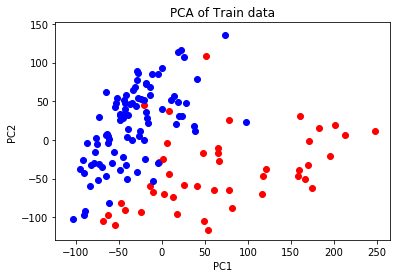

In [23]:
plt.figure()
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="r")
plt.scatter(z_tr[y_tr == -1, 0], z_tr[y_tr == -1, 1], color="b")
plt.title("PCA of Train data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In a PCA plot, it is usually more informative to print also the explained variances (e.g., in the axis labels):

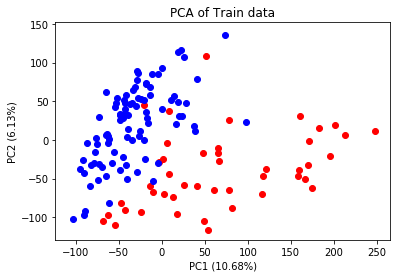

In [24]:
vars = pca.explained_variance_ratio_
plt.figure()
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="r")
plt.scatter(z_tr[y_tr == -1, 0], z_tr[y_tr == -1, 1], color="b")
plt.title("PCA of Train data")
plt.xlabel("PC1 (%.2f%%)" % (100*vars[0]))
plt.ylabel("PC2 (%.2f%%)" % (100*vars[1]))
plt.show()

_Now apply the transformation to the test data and plot it._

In [25]:
# Your code here...

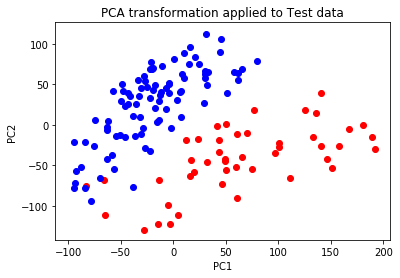

In [26]:
# %load sol2.py
z_ts = pca.transform(x_ts)
plt.figure()
plt.scatter(z_ts[y_ts == 1, 0], z_ts[y_ts == 1, 1], color="r")
plt.scatter(z_ts[y_ts == -1, 0], z_ts[y_ts == -1, 1], color="b")
plt.title("PCA transformation applied to Test data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# UMAP

In [27]:
# We need the development version of the umap Python module.
# Install it from source by cloning the GitHub repository and switching to the 0.3dev branch:

# git clone https://github.com/lmcinnes/umap.git
# cd umap
# git checkout 0.3dev
# python setup.py build
# python setup.py install

In [28]:
import umap

In [29]:
# parameters
n_neighbors = 10
min_dist = 0.1
n_components = 2
metric = "correlation"

In [30]:
mapping = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components,metric=metric)

In [31]:
umap_x_tr = mapping.fit_transform(x_tr)
umap_x_ts = mapping.transform(x_ts)

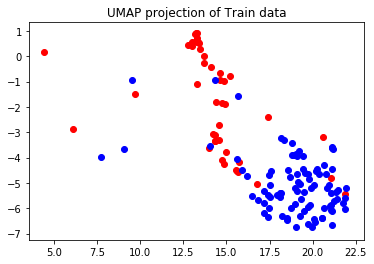

In [32]:
plt.figure()
plt.scatter(umap_x_tr[y_tr == 1, 0], umap_x_tr[y_tr == 1, 1], color="r")
plt.scatter(umap_x_tr[y_tr == -1, 0], umap_x_tr[y_tr == -1, 1], color="b")
plt.title("UMAP projection of Train data")
# plt.xlabel("PC1 (%.2f%%)" % (100*vars[0]))
# plt.ylabel("PC2 (%.2f%%)" % (100*vars[1]))
plt.show()

Let's see the projection of the test set:

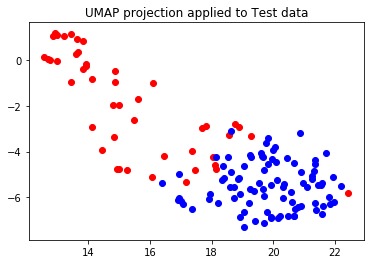

In [35]:
plt.figure()
plt.scatter(umap_x_ts[y_ts == 1, 0], umap_x_ts[y_ts == 1, 1], color="r")
plt.scatter(umap_x_ts[y_ts == -1, 0], umap_x_ts[y_ts == -1, 1], color="b")
plt.title("UMAP projection applied to Test data")
plt.show()

# Supervised Learning

Based on the PCA we built on our data, we decide to try some supervised learning on them.

Scikit-learn provides you access to several models via a very convenient _fit_ and _predict_ interface.

For example, let's fit a **Random Forest classifier** on the whole training data and then use this model to predict the labels of the test data:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500) # instantiate a RandomForestClassifier with a custom parameter
clf.fit(x_tr, y_tr) # fit the model on training data

In [ ]:
y_pred = clf.predict(x_ts) # predict labels on test data

What if we wanted to try a **Support Vector Machine** instead?

In scikit-learn it is as easy as choosing the appropriate class, i.e. **SVC** (Support Vector Classification):

In [ ]:
from sklearn.svm import SVC

Then we can fit and predict by using the same code as above:

In [ ]:
clf = SVC(probability=True) # instantiate a SVC object with default parameters
clf.fit(x_tr, y_tr)

In [ ]:
y_pred = clf.predict(x_ts)

_OK, I (over)simplified a bit here. In general, a classifier has hyper-**parameters** that need to be tuned. Default choices are not good in all situations._

_For example, in SVC the two main parameters are the **regularization** parameter C and the **kernel** function (linear, gaussian, polynomial, etc.)_

_Usually we search the parameter space (**Grid Search**) for the combination that yields the best Cross-Validation score_.

In [ ]:
clf.predict_proba(x_ts)

## Feature ranking

Let's go back to our previously trained Random Forest classifier.

In [ ]:
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_tr, y_tr)

What are the **most important features**? i.e., those having a greater power in discriminating the two sample classes?

One option is to rank features according to some classifier properties, such as Random Forest importances or Linear SVM weights.

We can sort the features according to the Random Forest importances (Gini impurity index), and make a simple stem plot of the first 10.

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(10):
    print("%d. feature %s (%f)" % (f + 1, feat_tr[indices[f]], importances[indices[f]]))


In [ ]:
plt.figure()
plt.title("Feature importances")
plt.stem(range(10), importances[indices[:10]])
plt.xticks(range(10), feat_tr[indices[:10]], rotation="vertical")
plt.xlim([-1, 10])
plt.show()

## Evaluating performance

Compute and print the confusion matrix.

### Recap

In this example, the first row is class -1, so the confusion matrix will look like:

|      |  |  Predicted  |    |
|------|-----------|----|----|
|      |           | -1 | 1  |
| True | -1        | TN | FP |
|      | 1         | FN | TP |


In [ ]:
y_pred = clf.predict(x_ts) # use the trained RandomForestClassifier to predict labels on x_ts

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_ts, y_pred)
conf

The total number of class -1 test samples (AN = All Negatives) should be equal to the sum of the first row of the confusion matrix, i.e., TN + FP:

In [ ]:
np.sum(y_ts==-1) # total number of "class -1" samples in the test set

Similarly for class 1, i.e., AP = All Positives = TP + FN:

In [ ]:
np.sum(y_ts==1) # total number of "class +1" samples in the test set

Compute the Accuracy, remembering/using the formula: 

ACC = (TN + TP) / (TN + TP + FN + FP)

TN and TP are on the main diagonal of our conf Numpy array. The denominator is equivalent to the overall sample size.

In [ ]:
(conf[0,0] + conf[1,1])/y_ts.shape[0] # y_ts.shape[0] is the sample size of the test set

Luckily Scikit-learn provides a quite handy alternative:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts, y_pred)

Now compute the MCC (again, Scikit-learn comes to our help):

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_ts, y_pred)

Looks good!

But how do I know if this model performs similarly well on a similar/unseen data set?

In other words, does this model generalize beyond its training set?

This is why data partitioning techniques are used.

# Data partitioning

Simple random split of a dataset in two groups (hold-out strategy), leaving 25% of the samples for model evaluation:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.25, random_state=1)

Let's retrain a Random Forest classifier on the new X_train set and use it to predict labels on the new X_test:

In [ ]:
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

Now try with different values of random_state.

## Cross-validation

Partitioning the dataset once in training/test is not enough. As you may have seen, the results are fairly dependent on the random seed that was used in the splitting function.

Other strategies involve splitting the data in **multiple (complementary) subsets**.

For example, let's split the training dataset x_tr using a **5-fold** partitioning schema, keeping the class label proportions across folds:

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

N = skf.get_n_splits(x_tr, y_tr)

for i, (idx_tr, idx_ts) in enumerate(skf.split(x_tr, y_tr)):
    print("Fold %d / %d" % (i+1, N))
    X_train, Y_train = x_tr[idx_tr], y_tr[idx_tr]
    X_test, Y_test = x_tr[idx_ts], y_tr[idx_ts]
    print("TRAIN size:", X_train.shape[0])
    print("-- class 1:", np.sum(Y_train==1), "class -1:", np.sum(Y_train==-1))
    print("TEST size:", X_test.shape[0])
    print("-- class 1:", np.sum(Y_test==1), "class -1:", np.sum(Y_test==-1))
    print()


## Implementing a basic Data Analysis Protocol

As a final example, we implement a 10x 5-fold Cross-validation schema with a simple feature ranking. 

For each CV iteration, a Random Forest model is trained on the training portion of the data, then features are ranked according to the Random Forest importances; a series of Random Forest models are built upon an increasing number of the ranked features (i.e., 1, 5, 10, etc.) and evaluated on the test data in terms of MCC.

The average MCC over the 10x5 CV iterations is computed for the different feature set sizes. We choose the feature set size that maximizes the average MCC.

This basic example is meant as a starting point for building more complex pipelines, i.e., with more feature steps, (bootstrapped) confidence intervals for MCC, computation of a unified ranked feature list (as in Jurman et al., _Bioinformatics_, 2008).

<img src="img/dap.png" width="85%">

In [ ]:
CV_N = 10 # number of CV iterations
CV_K = 5 # number of CV folds
FEATURE_STEPS = [1, 5, 10, 25, 50, 100]
# prepare output MCC array
MCC = np.empty((CV_K*CV_N, len(FEATURE_STEPS)))
         

In [ ]:
for n in range(CV_N):
    print(f"~~~ Iteration {n+1} ~~~")
    skf = StratifiedKFold(n_splits=CV_K, shuffle=True, random_state=n)
    for i, (idx_tr, idx_ts) in enumerate(skf.split(x_tr, y_tr)):
        print(f"Fold {i+1}")
        X_train, Y_train = x_tr[idx_tr], y_tr[idx_tr]
        X_test, Y_test = x_tr[idx_ts], y_tr[idx_ts]
        
        clf = RandomForestClassifier(n_estimators=500, random_state=n)
        clf.fit(X_train, Y_train)
        ranking = np.argsort( clf.feature_importances_ )[::-1]
        
        for j, s in enumerate(FEATURE_STEPS):
            v = ranking[:s] # consider the top s ranked features
            X_tr_fs, X_ts_fs = X_train[:, v], X_test[:, v] # extract them from internal train and test data
            clf.fit(X_tr_fs, Y_train) # train a classifier on the reduced train dataset
            YP = clf.predict(X_ts_fs) # predict on the reduced test dataset
            MCC[(n*CV_K)+i, j] = matthews_corrcoef(Y_test, YP) # evaluate the model performance
        
    print()


In [ ]:
# np.save("MCC_CV", MCC)
# MCC = np.load("MCC_CV.npy")

In [ ]:
MCC_avg = np.mean(MCC, axis=0)
MCC_max = np.max(MCC_avg)
n_feats = FEATURE_STEPS[np.argmax(MCC_avg)]

In [ ]:
# average MCC for each feature step
for nf, mcc in zip(FEATURE_STEPS, MCC_avg):
    print("nf = %d, MCC = %.2f" % (nf, mcc))

print()

print("Best MCC = %.2f with %d features" % (MCC_max, n_feats))


In [ ]:
plt.figure()
plt.title("Average MCC")
plt.plot(FEATURE_STEPS, MCC_avg, 'o-')
plt.xlabel("Number of features")
plt.ylabel("MCC")
plt.show()